Limiting resolution: 1.414 lp/mm, 0.354 mm
Limiting resolution: 1.414 lp/mm, 0.354 mm
Limiting resolution: 1.414 lp/mm, 0.354 mm


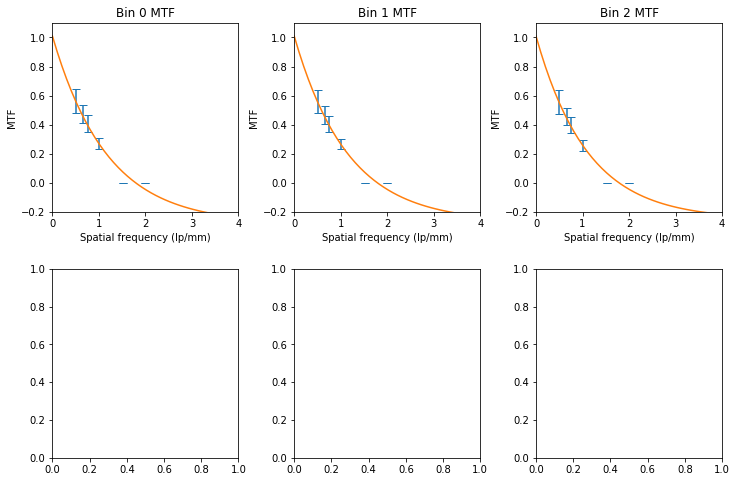

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
# Do a curve fit with exponential
from scipy.optimize import curve_fit

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data'
folder = '21-05-05_CT_metal_30keV_bins'

sub = 'water_only'

num_bins = 3

mtf_data = np.load(os.path.join(directory, folder, sub, 'mtf_water_contrast.npy'))

bar_size = np.array([1, 0.75, 0.66, 0.5, 0.33, 0.25])
freq = 1 / (2 * bar_size)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

freq_fit = np.linspace(0, 10, 100)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    if i > num_bins-1:
        break
    mtf_mean = mtf_data[i, 0]
    mtf_std = mtf_data[i, 1]

    popt, pcov = curve_fit(func, np.insert(freq, 0, 0), np.insert(mtf_mean, 0, 1))

    # Find the 0.1 spot
    mtf_new = func(freq_fit, *popt)
    idx = np.abs(mtf_new - 0.1).argmin()
    idx = np.abs(mtf_new - 0.1).argmin()
    print(f'Limiting resolution: {freq_fit[idx]:0.3f} lp/mm, {1/(2*freq_fit[idx]):0.3f} mm')

    ax.errorbar(freq, mtf_mean, yerr=mtf_std, capsize=4, fmt='none')
    ax.plot(freq_fit, mtf_new)
    ax.set_title(f'Bin {i} MTF')
    ax.set_ylabel('MTF')
    ax.set_xlabel('Spatial frequency (lp/mm)')
    ax.set_xlim([0, 4])
    ax.set_ylim([-0.2, 1.1])

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
fig.savefig(os.path.join(directory, folder, sub+'_mtf.png'), dpi=500)

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


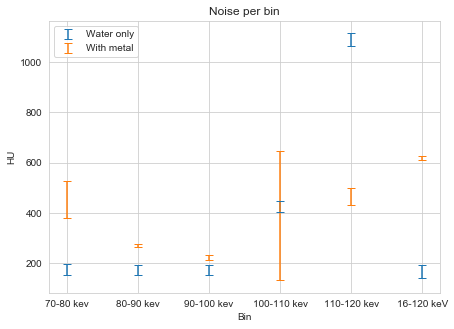

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data'
folder = '21-05-05_CT_metal_artifact'
water_sub = 'water_only'
sub = '2_metal_3and4'

bin_width = 1  # Multiples of 10
thresholds = [70, 80, 90, 100, 110, 120]

# Load the metal artifact data
data = np.load(os.path.join(directory, folder, sub, 'Norm CT', 'CT_norm.npy'))[:, 11:14]
num_bins = np.shape(data)[0]
noise_mtf = np.load(os.path.join(directory, folder, sub, 'noise_mtf.npy'))

# Load the water data to compare
water_data = np.load(os.path.join(directory, folder, water_sub, 'Norm CT', 'CT_norm.npy'))[:, 11:14]
noise_water_mtf = np.load(os.path.join(directory, folder, water_sub, 'noise_mtf.npy'))

noise_data = np.zeros((num_bins, 3))
noise_water = np.zeros((num_bins, 3))  # number of bins, slices
for i in range(num_bins):
    for z in range(3):
        noise_data[i, z] = np.nanstd(data[i, z]*noise_mtf)
        noise_water[i, z] = np.nanstd(water_data[i, z]*noise_water_mtf)

# Get the std of the noise over the slices
std_data = np.std(noise_data, axis=1)
std_water = np.std(noise_water, axis=1)

# Get the x tick labels
labels = []
if bin_width == 1:
    for i in range(num_bins-bin_width):
        labels.append(f'{thresholds[i]}-{thresholds[i+1]} kev')
    labels.append('16-120 keV')
else:
    for i in range(num_bins):
        labels.append(f'{thresholds[i]}-{thresholds[i+(bin_width)]} kev')

# Take the mean of the noise over the slices
noise_data = np.mean(noise_data, axis=1)
noise_water = np.mean(noise_water, axis=1)

sns.set_style('whitegrid')
fig = plt.figure(figsize=(7, 5))
plt.errorbar(np.arange(num_bins), noise_water, yerr=std_water, capsize=4, fmt='none')
plt.errorbar(np.arange(num_bins), noise_data, yerr=std_data, capsize=4, fmt='none')
plt.xticks(np.arange(num_bins), labels)
plt.title(f'Noise per bin')
plt.legend(['Water only', 'With metal'])
plt.ylabel('HU')
plt.xlabel('Bin')


fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.show()
fig.savefig(os.path.join(directory, folder, sub+'_noise.png'), dpi=500)

c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


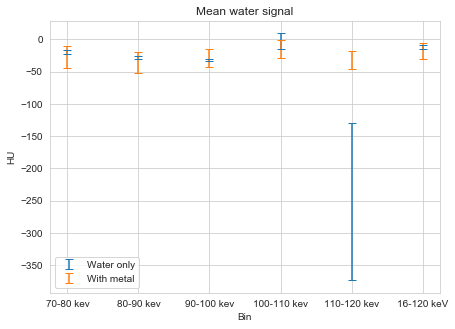

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data'
folder = '21-05-05_CT_metal_artifact'
water_sub = 'water_only'
sub = '3_metal'

bin_width = 1  # Multiples of 10
thresholds = [70, 80, 90, 100, 110, 120]

# Load the metal artifact data
data = np.load(os.path.join(directory, folder, sub, 'Norm CT', 'CT_norm.npy'))[:, 11:14]
num_bins = np.shape(data)[0]
mtf_data = np.load(os.path.join(directory, folder, sub, 'water_mtf.npy'))

# Load the water data to compare
water_data = np.load(os.path.join(directory, folder, water_sub, 'Norm CT', 'CT_norm.npy'))[:, 11:14]
mtf_water = np.load(os.path.join(directory, folder, water_sub, 'water_mtf.npy'))

mean_data = np.zeros((num_bins, 3))
mean_water = np.zeros((num_bins, 3))  # number of bins, slices
for i in range(num_bins):
    for z in range(3):
        mean_data[i, z] = np.nanmean(data[i, z]*mtf_data)
        mean_water[i, z] = np.nanmean(water_data[i, z]*mtf_water)

# Get the std of the noise over the slices
std_data = np.std(mean_data, axis=1)
std_water = np.std(mean_water, axis=1)

# Get the x tick labels
labels = []
if bin_width == 1:
    for i in range(num_bins-bin_width):
        labels.append(f'{thresholds[i]}-{thresholds[i+1]} kev')
    labels.append('16-120 keV')
else:
    for i in range(num_bins):
        labels.append(f'{thresholds[i]}-{thresholds[i+(bin_width)]} kev')

# Take the mean of the noise over the slices
mean_data = np.mean(mean_data, axis=1)
mean_water = np.mean(mean_water, axis=1)

sns.set_style('whitegrid')
fig = plt.figure(figsize=(7, 5))
plt.errorbar(np.arange(num_bins), mean_water, yerr=std_water, capsize=4, fmt='none')
plt.errorbar(np.arange(num_bins), mean_data, yerr=std_data, capsize=4, fmt='none')
plt.xticks(np.arange(num_bins), labels)
plt.title(f'Mean water signal')
plt.legend(['Water only', 'With metal'])
plt.ylabel('HU')
plt.xlabel('Bin')


fig.subplots_adjust(wspace=0.3, hspace=0.3)
fig.show()
fig.savefig(os.path.join(directory, folder, sub+'_water.png'), dpi=500)


Limiting resolution: 10.00 lp/mm, 0.050 mm


c:\users\drich\appdata\local\programs\python\python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


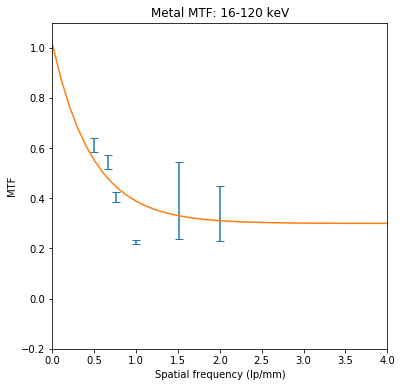

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
# Do a curve fit with exponential
from scipy.optimize import curve_fit

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data'
folder = '21-04-14_CT_bin_width_10'

# sub = 'water_phantom'
sub = 'metal_phantom'

bin_num = 5

mtf_data = np.load(os.path.join(directory, folder, sub, 'mtf.npy'))

bar_size = np.array([1, 0.75, 0.66, 0.5, 0.33, 0.25])
freq = 1 / (2 * bar_size)

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

freq_fit = np.linspace(0, 10, 100)

fig = plt.figure(figsize=(6, 6))

mtf_mean = mtf_data[bin_num, 0]
mtf_std = mtf_data[bin_num, 1]

popt, pcov = curve_fit(func, np.insert(freq, 0, 0), np.insert(mtf_mean, 0, 1))

# Find the 0.1 spot
mtf_new = func(freq_fit, *popt)
idx = np.abs(mtf_new - 0.2).argmin()
print(f'Limiting resolution: {freq_fit[idx]:0.2f} lp/mm, {1/(2*freq_fit[idx]):0.3f} mm')

plt.errorbar(freq, mtf_mean, yerr=mtf_std, capsize=4, fmt='none')
plt.plot(freq_fit, mtf_new)
plt.title('Metal MTF: 16-120 keV')
plt.ylabel('MTF')
plt.xlabel('Spatial frequency (lp/mm)')
plt.xlim([0, 4])
plt.ylim([-0.2, 1.1])

fig.show()
# fig.savefig(os.path.join(directory, folder, sub+'metal_only.png'), dpi=500)